In [1]:
import Pkg
Pkg.activate(@__DIR__)

  Activating project at `c:\Users\Arnau\Documents\HORS_JEUX\stage\2025_Internship_SWG_Pomme\AR`


In [2]:
##Folder to print results
folder="Results/nantes"

##Station
file="../mystations/TX_Nantes.txt"

##AR model
p=1
method_="monthlyLL"                 # "mean", "median", "concat", "sumLL", "monthlyLL"
periodicity_model="trigo"           # "trigo", "smooth", "autotrigo", "stepwise_trigo"
degree_period=0                     # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
Trendtype="LOESS"                   # "LOESS", "polynomial", "null" (for no additive trend)
trendparam=nothing                  # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1
σ_periodicity_model="trigo"         # "trigo", "smooth", "autotrigo", "stepwise_trigo", "null" (for no multiplicative periodicity)
σ_degree_period=0                   # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
σ_Trendtype="LOESS"                 # "LOESS", "polynomial", "null" (for no multiplicative trend)
σ_trendparam=nothing                # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1

##Simulations
n=1000

1000

In [10]:
include("table_reader.jl")
include("utils/Missing_values.jl")
include("utils/Structure.jl")
include("utils/Plotting.jl")
cd(@__DIR__)

In [4]:
settings = OrderedDict((("file", file),
    ("p", p),
    ("method_", method_),
    ("periodicity_model", periodicity_model),
    ("degree_period", degree_period),
    ("Trendtype", Trendtype),
    ("trendparam", trendparam),
    ("σ_periodicity_model", σ_periodicity_model),
    ("σ_degree_period", σ_degree_period),
    ("σ_Trendtype", σ_Trendtype),
    ("σ_trendparam", σ_trendparam),
    ("n", n)))

OrderedDict{String, Any} with 12 entries:
  "file"                => "../mystations/TX_Nantes.txt"
  "p"                   => 1
  "method_"             => "monthlyLL"
  "periodicity_model"   => "trigo"
  "degree_period"       => 0
  "Trendtype"           => "LOESS"
  "trendparam"          => nothing
  "σ_periodicity_model" => "trigo"
  "σ_degree_period"     => 0
  "σ_Trendtype"         => "LOESS"
  "σ_trendparam"        => nothing
  "n"                   => 1000

In [5]:
series=extract_series(file,plot=false)
series=truncate_MV(series)

Caracteristics_Series = init_CaracteristicsSeries(series)

CaracteristicsSeries([9.315555555555557, 9.337777777777777, 9.04888888888889, 9.424444444444445, 9.540000000000001, 9.484444444444444, 8.635555555555555, 9.264444444444443, 9.41111111111111, 9.113333333333332  …  10.22888888888889, 10.253333333333332, 10.386666666666667, 10.091111111111113, 9.499999999999998, 8.99777777777778, 8.833333333333334, 9.173333333333336, 9.44, 8.993333333333336], [16.1, 14.6, 14.0, 14.6, 14.5, 14.2, 15.5, 14.5, 15.4, 13.8  …  15.9, 15.4, 15.3, 15.8, 14.5, 14.5, 14.4, 14.5, 17.7, 17.1], 12×4 DataFrame
 Row │ MONTH  MONTHLY_MEAN  MONTHLY_STD  MONTHLY_MAX 
     │ Int64  Float64       Float64      Float64     
─────┼───────────────────────────────────────────────
   1 │     1       9.14208      3.90354         18.2
   2 │     2      10.3013       3.83608         22.6
   3 │     3      13.3449       3.28981         24.2
   4 │     4      16.0036       3.7747          28.3
   5 │     5      19.4827       4.06376         32.8
   6 │     6      22.9614       4.17258 

In [6]:
# Model = fit_AR(series[:, 2], series.DATE,
#     p=p,
#     method_=method_,
#     periodicity_model=periodicity_model,
#     degree_period=degree_period,
#     Trendtype=Trendtype,
#     trendparam=trendparam,
#     σ_periodicity_model=σ_periodicity_model,
#     σ_degree_period=σ_degree_period,
#     σ_Trendtype=σ_Trendtype,
#     σ_trendparam=σ_trendparam)

Model = load_model("Results/TX/Nantes/p=3,k=2/model.jld2")

sample_ = rand(Model, n, series.DATE,return_res=true)


([[3.3000000000000007, 9.7, 11.1, 10.858236025119707, 10.917716112198427, 11.572936037243153, 8.23553693810186, 7.370936869270398, 7.879151954137051, 7.61140140233748  …  14.14809280731403, 13.053990179222843, 12.015146167261115, 9.922435267093755, 7.776173228138799, 6.878836555832611, 10.63980814892493, 7.4655829738677895, 10.721545145439526, 8.409308059179219], [3.3000000000000007, 9.7, 11.1, 8.04978870889489, 7.731703016998798, 9.743294874417378, 10.874458683406827, 10.906292013034397, 12.337017563195968, 9.840320506519113  …  4.990193727729829, 8.682632775377508, 7.218780270315088, 9.502275391417617, 9.732821676162066, 8.078279813422808, 7.791283464343357, 8.194858820408232, 7.826212584880257, 9.011733653573904], [3.3000000000000007, 9.7, 11.1, 10.72907274890541, 12.30174107290439, 11.532248409981447, 10.464145471816327, 13.95500836299854, 11.94655251234486, 12.441011999455995  …  7.48175737481106, 7.545921744557107, 10.211724380572191, 10.57131200386781, 9.428648900557267, 12.7389

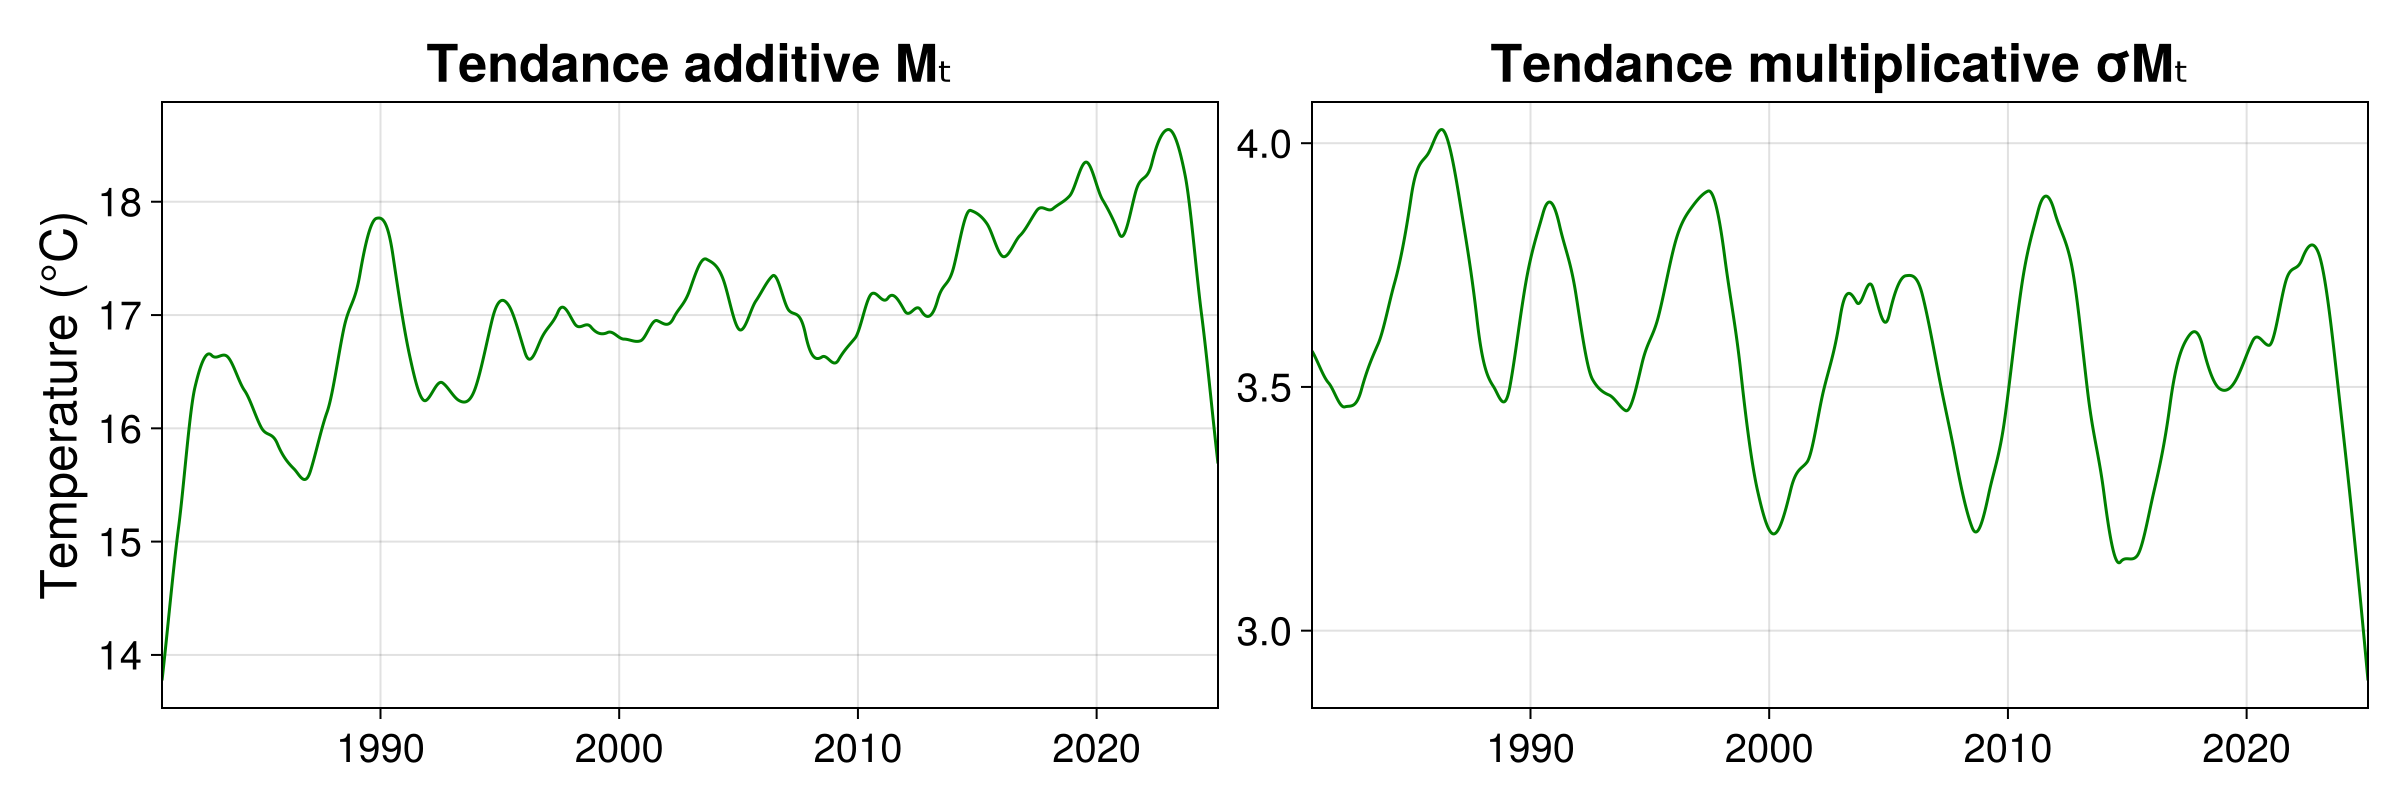

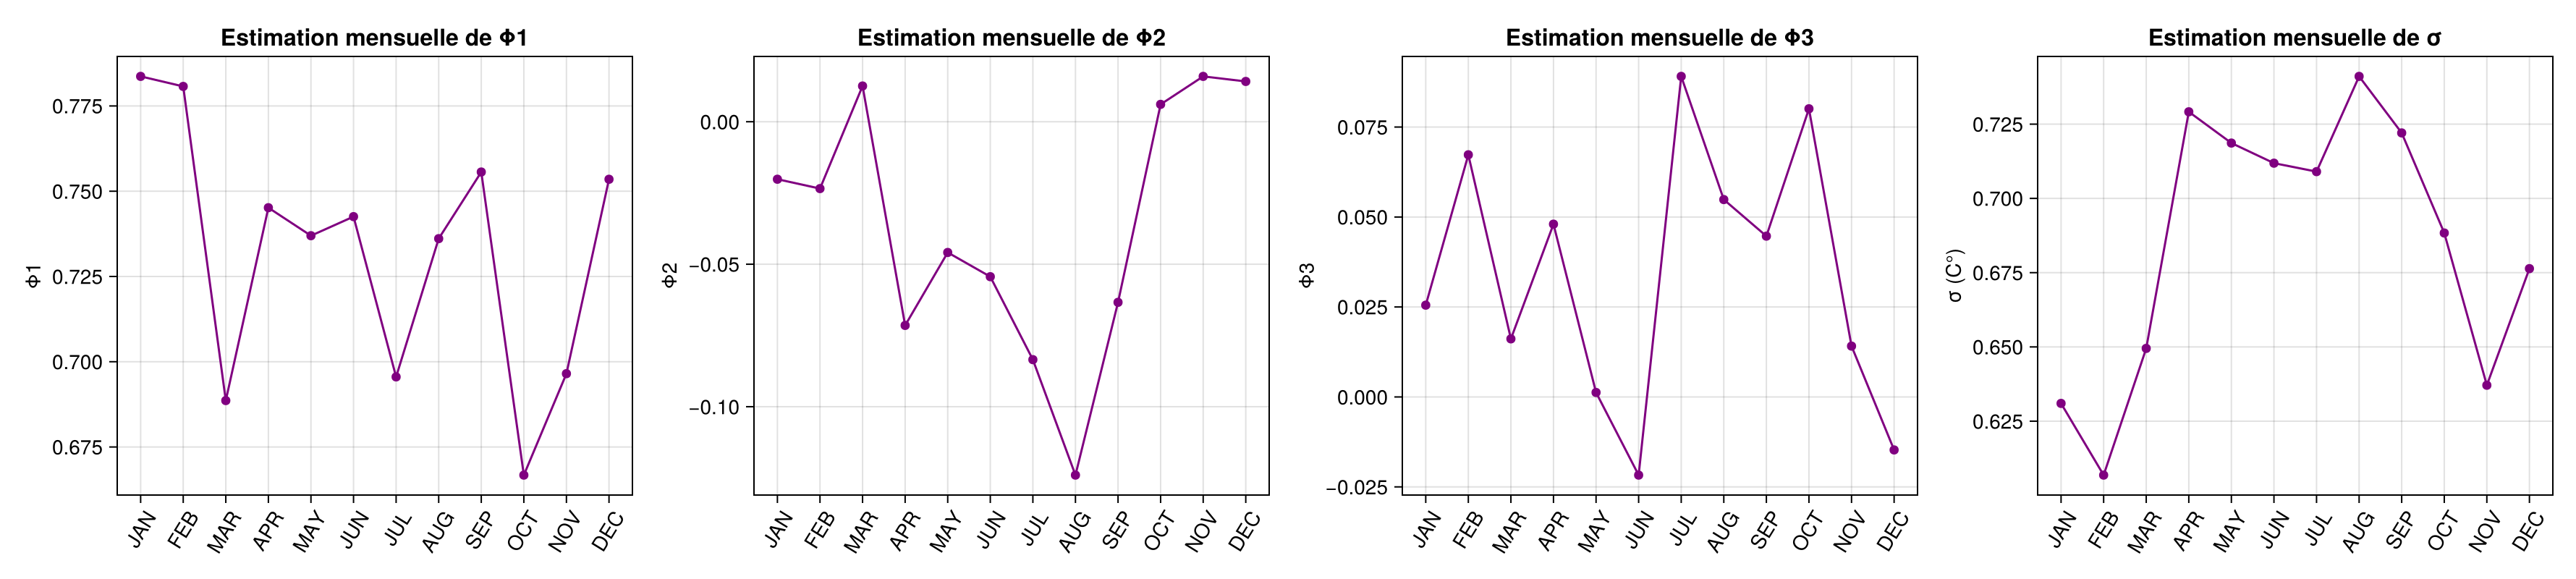

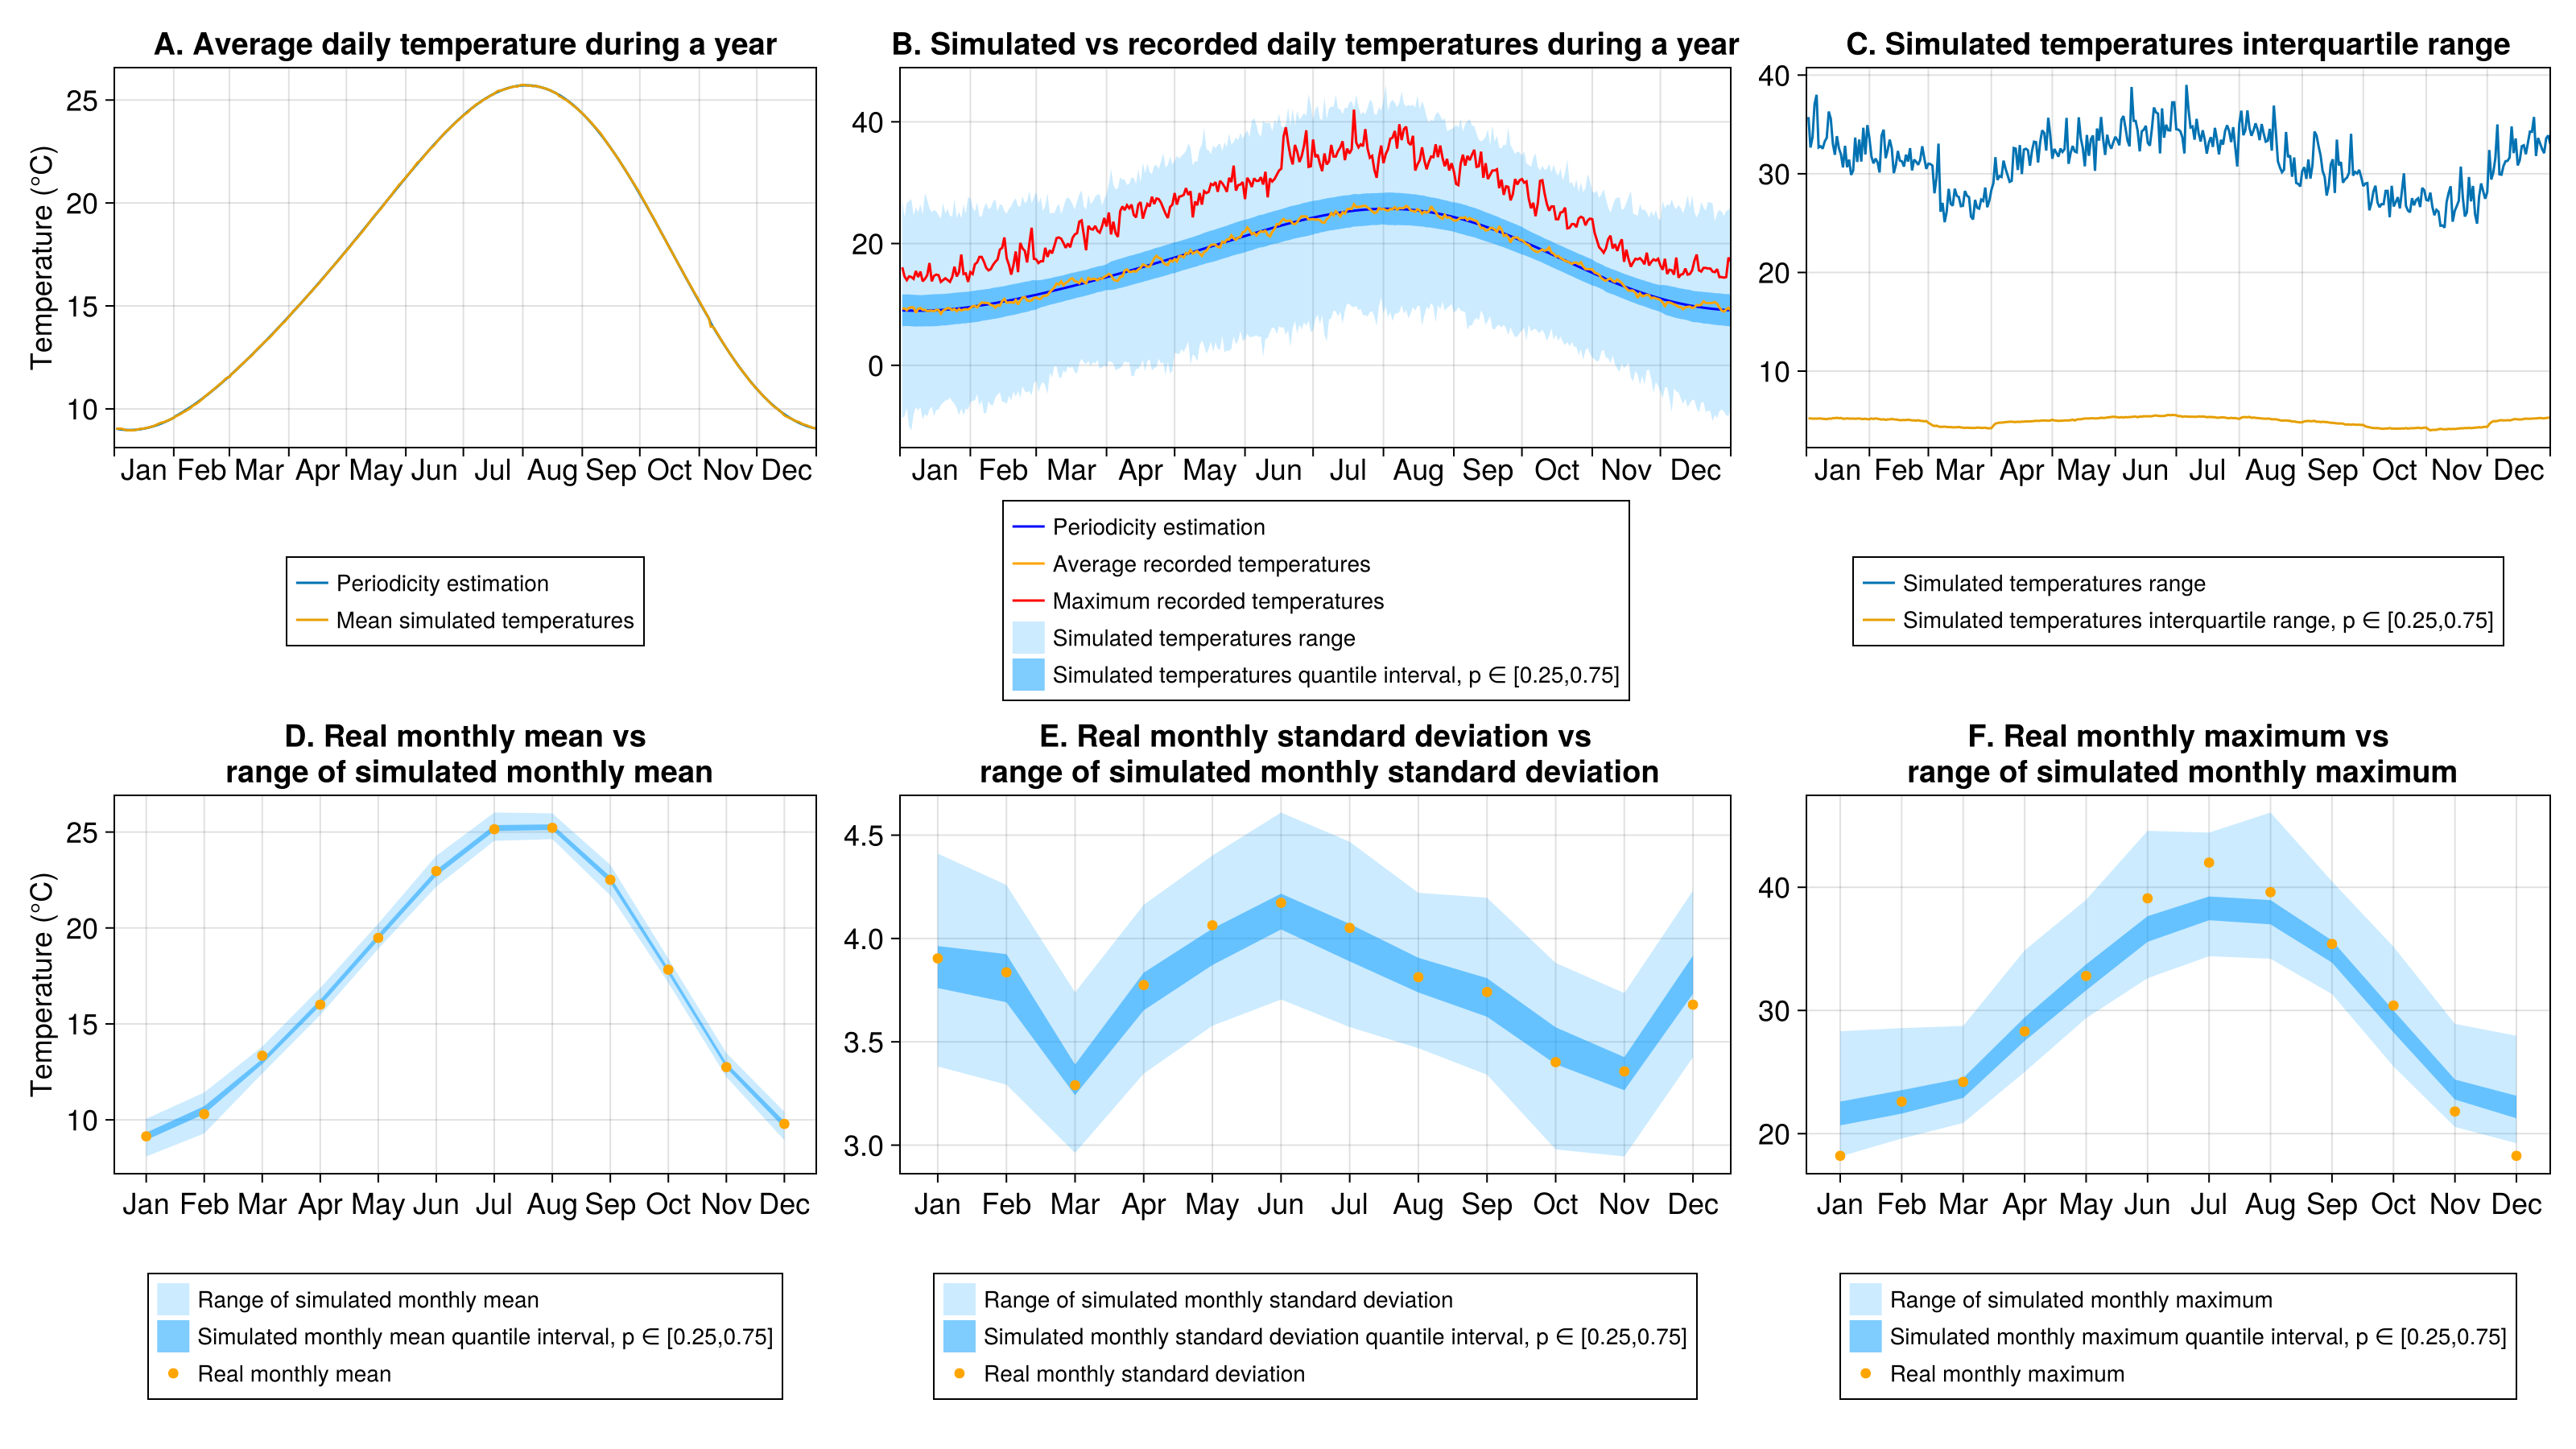

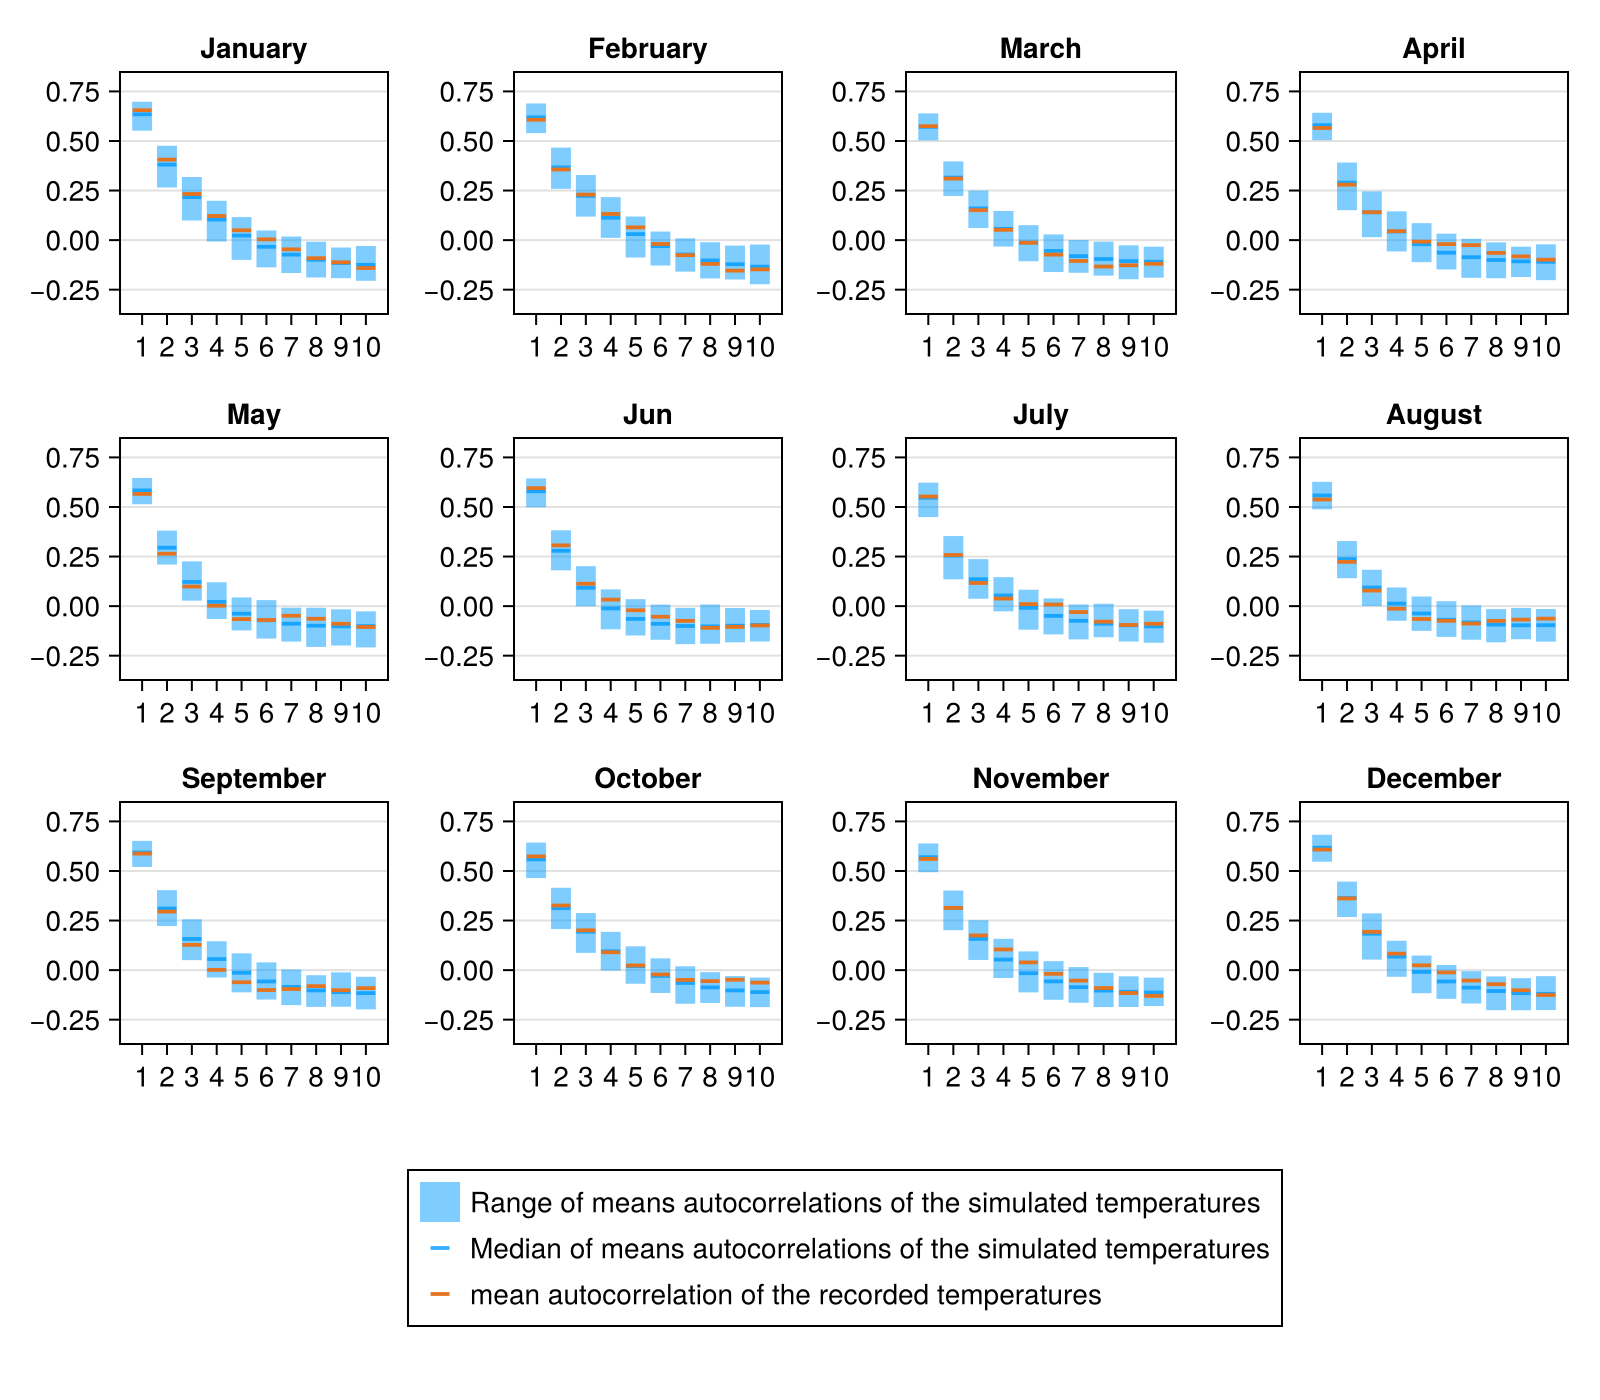

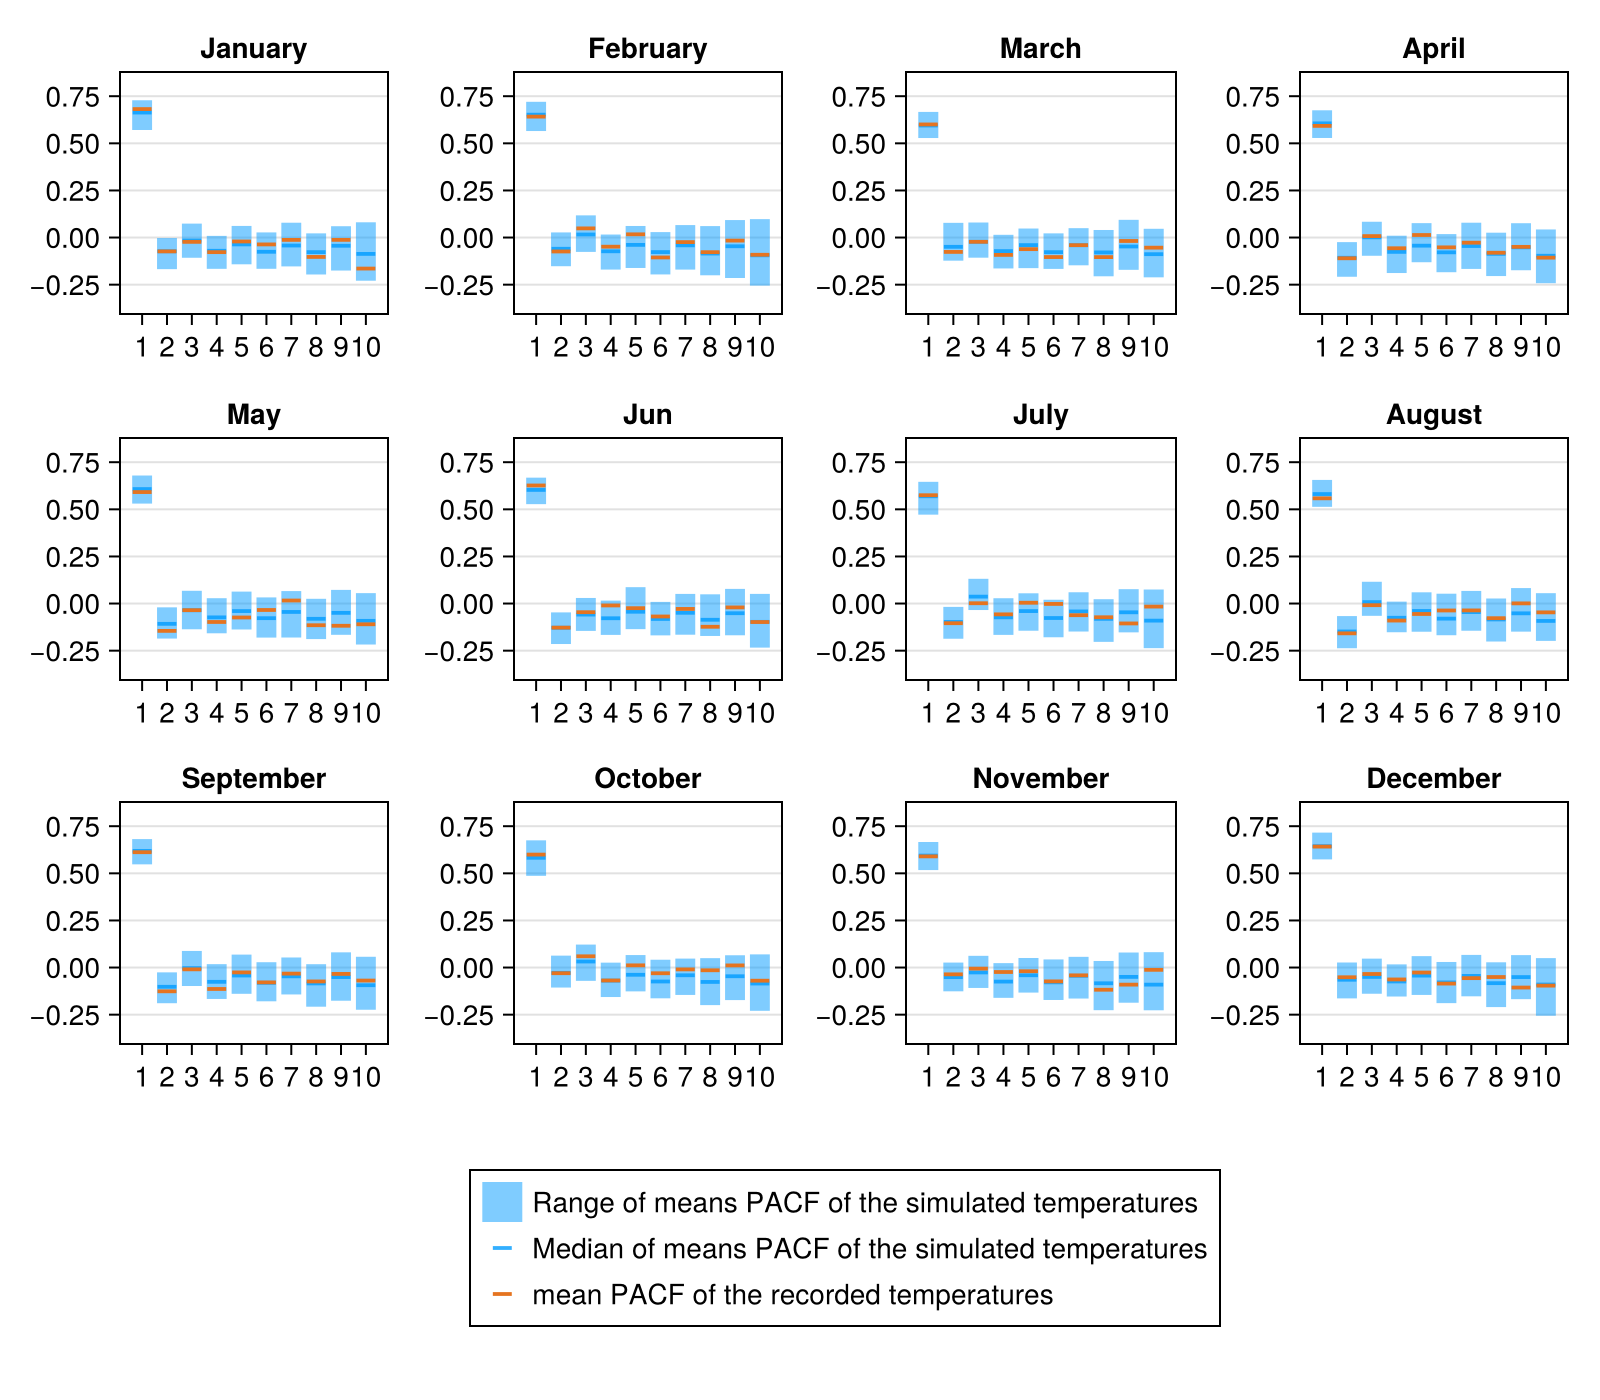

Additive periodicity order : 2
Multiplicative periodicity order : 2


In [22]:
include("utils/ACF_PACF.jl")
include("utils/Plotting.jl")
cd(@__DIR__)
fig_tuple = Sample_diagnostic(sample_, Caracteristics_Series, Model, folder=folder, settings=settings, size = (1600,900), format_="horizontal")
display.(fig_tuple)
println("Additive periodicity order : $(Model.period_order)")
println("Multiplicative periodicity order : $(Model.σ_period_order)")